In [71]:
import numpy as np 





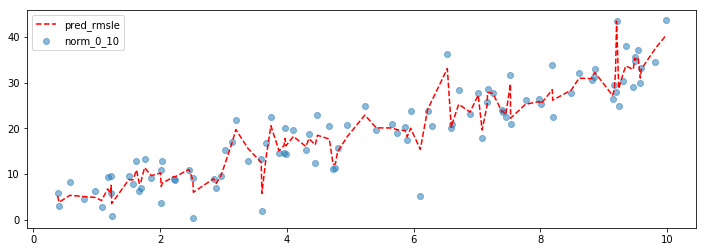

In [76]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error

def rmsle(predicted_values, actual_values, convertExp=True):
    """
    - root mean squared log error는 error를 로그화값으로 변환하고, 제곱하고, 평균을 내고, 루트를 씌웁니다.
    - skewness를 해결하기 위해 np.log1p를 했기 때문에, 값을 예측할 때 이를 다시 변환해서 처리해주는 것이 필요합니다. 
    """
    if convertExp==True:
        predicted_values = np.exp(predicted_values),
        actual_values = np.exp(actual_values)
        
    log_predicted_values = np.log(np.array(predicted_values)+1)
    log_actual_values = np.log(np.array(actual_values)+1)

    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = np.square(log_predicted_values - log_actual_values)
    return np.sqrt(difference.mean())

sample_size = 100
x = np.random.uniform(0, 10, sample_size)
y = x*3 + np.random.normal(3, 5, sample_size)

reg_rmsle = GridSearchCV(RandomForestRegressor(), {}, 
                   scoring=make_scorer(rmsle, greater_is_better=False))
reg_rmsle.fit(x.reshape(-1, 1), y)

plt.figure(figsize=(12, 4))
plt.scatter(x, y, alpha=0.5, label="norm_0_10")
plt.plot(sorted(x), reg_rmsle.predict(np.array(sorted(x)).reshape(-1, 1)), 
         c='red', label='pred_rmsle', linestyle='--')
plt.legend()
plt.savefig('../../assets/images/markdown_img/180611_makescorer.svg')
plt.show()


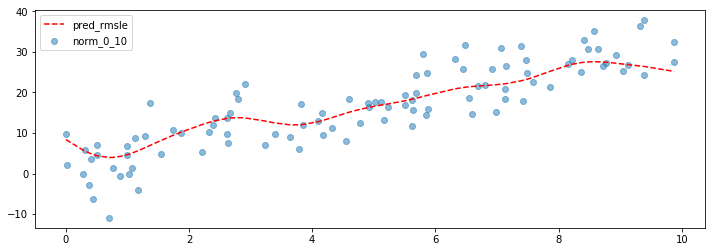

In [87]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.svm import SVR

def rmsle(predicted_values, actual_values, convertExp=True):
    """
    - root mean squared log error는 error를 로그화값으로 변환하고, 제곱하고, 평균을 내고, 루트를 씌웁니다.
    - skewness를 해결하기 위해 np.log1p를 했기 때문에, 값을 예측할 때 이를 다시 변환해서 처리해주는 것이 필요합니다. 
    """
    if convertExp==True:
        predicted_values = np.exp(predicted_values),
        actual_values = np.exp(actual_values)
        
    log_predicted_values = np.log(np.array(predicted_values)+1)
    log_actual_values = np.log(np.array(actual_values)+1)

    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = np.square(log_predicted_values - log_actual_values)
    return np.sqrt(difference.mean())

sample_size = 100
x = np.random.uniform(0, 10, sample_size)
y = x*3 + np.random.normal(3, 5, sample_size)

reg = SVR()
reg = GridSearchCV(SVR(), param_grid={'C':[0.001, 1.0, 3.0, 10.0],
                                      'kernel':['rbf']
                                     })
reg.fit(x.reshape(-1, 1), y)

plt.figure(figsize=(12, 4))
plt.scatter(x, y, alpha=0.5, label="norm_0_10")
plt.plot(sorted(x), reg.predict(np.array(sorted(x)).reshape(-1, 1)), 
         c='red', label='pred_rmsle', linestyle='--')
plt.legend()
plt.savefig('../../assets/images/markdown_img/180611_makescorer_cv.svg')
plt.show()

